# IS 503 IT STRATEGIC PLANNING AND MANAGEMENT TEST 2

<b>Author: Mathabo Amelia Mokoma</b>

<b>Tel:  +26658899998</b>

<b>E-mail: mokoma.mathaboamelia@student.utamu.ac.ug</b>

<b>DATE : 25-JULY-2021</b>

In [1]:
!pip install lxml

In [2]:
import requests
import lxml.html as lh
import pandas as pd
df = pd.DataFrame()

In [3]:
#Reading the data
my_url = 'https://www.worldometers.info/bicycles/'

page = requests.get(my_url) # create a handle to for contents of the wiki page

doc = lh.fromstring(page.content) # store content of the wiki page under doc

tr_elements = doc.xpath('//tr') # parse data stored between tr in the html

[len(T) for T in tr_elements[:12]] # check the length of the first 12 rows

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [4]:
tr_elements = doc.xpath('//tr') # parse first row as header

col = [] # create empty list
i = 0

for t in tr_elements[0]: # for each row, store each first element (header) and an empty list
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:Country 
2:Quantity
3:Year


In [5]:
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=3: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

In [6]:
[len(C) for (title,C) in col]

[25, 25, 25]

In [7]:
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [8]:
df.head()

,Country,Quantity,Year
0,,,
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996


In [9]:
df.tail()

,Country,Quantity,Year
20,Switzerland,"3,800,000",1996
21,Hungary,"3,500,000",1995
22,Australia,"3,300,000",1995
23,Finland,"3,250,000",1995
24,Norway,"3,000,000",1995


In [10]:
df.shape

(25, 3)

# Data Cleaning

In [11]:
def dataframeCleaner(df):
    for columnname in df: #looping through titles of the table
        temp = []
        for column in df [columnname]: #geting column elements for the each title
            column = str(column)
            column = column.replace(',','') # Removing unwanted data clutter
            #column = column.replace('+','') #Removing unwanted '+'sign 
            try : #using try except block to convert datatype string to integer while avoiding error
                column = int(column)
            except: 
                pass
            temp.append(column)
        df[columnname] = temp
    df = df.drop(df.tail(1).index) # Deleting the last row
    df = df.replace(r'^\s*$',0,regex=True) # converting empty string to 0
    return df

In [12]:
df

,Country,Quantity,Year
0,,,
1,China,"450,000,000",1992
2,USA,"100,000,000",1995
3,Japan,"72,540,000",1996
4,Germany,"62,000,000",1996
5,India,"30,800,000",1990
6,Indonesia,"22,300,000",1982
7,Italy,"23,000,000",1995
8,UK,"20,000,000",1995
9,France,"20,000,000",1995


In [13]:
df.dtypes

Country     object
Quantity    object
Year        object
dtype: object

In [14]:
df = dataframeCleaner(df)
df

,Country,Quantity,Year
0,0,0,0
1,China,450000000,1992
2,USA,100000000,1995
3,Japan,72540000,1996
4,Germany,62000000,1996
5,India,30800000,1990
6,Indonesia,22300000,1982
7,Italy,23000000,1995
8,UK,20000000,1995
9,France,20000000,1995


In [15]:
df.dtypes

Country     object
Quantity     int64
Year         int64
dtype: object

In [16]:
df = df.infer_objects()
df

,Country,Quantity,Year
0,0,0,0
1,China,450000000,1992
2,USA,100000000,1995
3,Japan,72540000,1996
4,Germany,62000000,1996
5,India,30800000,1990
6,Indonesia,22300000,1982
7,Italy,23000000,1995
8,UK,20000000,1995
9,France,20000000,1995


In [17]:
df.describe()

,Quantity,Year
count,2.400000e+01,24.000000
mean,3.838708e+07,1910.458333
std,9.119344e+07,406.945780
min,0.000000e+00,0.000000
25%,4.875000e+06,1992.000000
50%,8.550000e+06,1995.000000
75%,2.495000e+07,1995.000000
max,4.500000e+08,2000.000000


In [18]:
df.corr()

,Quantity,Year
Quantity,1.00000,0.08928
Year,0.08928,1.00000


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

<b>A Column Chart of Number of bicycles per Country</b>

In [20]:
my_df = df.drop([0])

In [21]:
my_df

,Country,Quantity,Year
1,China,450000000,1992
2,USA,100000000,1995
3,Japan,72540000,1996
4,Germany,62000000,1996
5,India,30800000,1990
6,Indonesia,22300000,1982
7,Italy,23000000,1995
8,UK,20000000,1995
9,France,20000000,1995
10,Brazil,40000000,1996


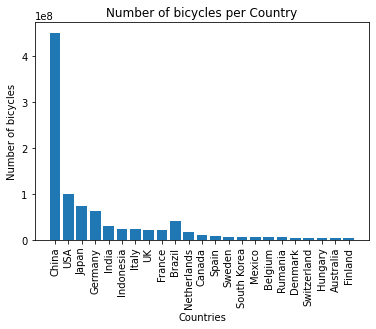

In [22]:
X = ['China','USA','Japan','Germany','India','Indonesia','Italy','UK','France','Brazil','Netherlands','Canada','Spain','Sweden','South Korea','Mexico','Belgium','Rumania','Denmark','Switzerland','Hungary','Australia','Finland']
Y = my_df['Quantity'].to_list()

plt.bar(X,Y)
plt.xlabel("Countries")
plt.ylabel("Number of bicycles")
plt.title("Number of bicycles per Country")
plt.xticks(rotation=90)
plt.show()

<b>A Bar Chart of Number of bicycles per Country</b>

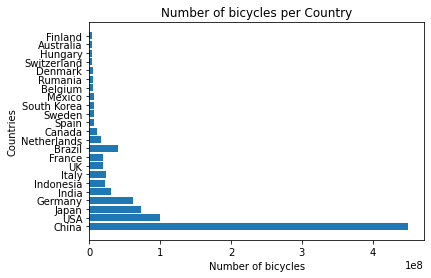

In [23]:
X = ['China','USA','Japan','Germany','India','Indonesia','Italy','UK','France','Brazil','Netherlands','Canada','Spain','Sweden','South Korea','Mexico','Belgium','Rumania','Denmark','Switzerland','Hungary','Australia','Finland']
Y = my_df['Quantity'].to_list()  
plt.barh(X,Y)
plt.xlabel("Number of bicycles")
plt.ylabel("Countries")
plt.title("Number of bicycles per Country")
plt.show()